# Factors Influencing US Home Prices Nationally

Key Factors:
    
    Factors Affecting Demand:
    Demographic factors:
        Population
        Changes in age distribution
        Changes in income distribution
    Economical Factors:
        GDP
        Unemployment rate
        Interest rate
        Inflation
    Government Factors:
        Tax benifits/ subsidies
        Infrastructure development/ spending
    
    Factors Affecting Supply:
        Cost of Raw materials
        Availibility of Loabour
        Permit costs
    

## Data Collection

Soucres:

CSUSHPISA: S&P/Case-Shiller U.S. National Home Price Index Units: Index Jan 2000=100,Seasonally Adjusted
Frequency: Monthly Source: https://fred.stlouisfed.org/series/CSUSHPISA

HNFSEPUSSA: New One Family Homes for Sale in the United States Units: Thousands of Units,Seasonally Adjusted
Frequency: Monthly, End of Month Source: https://fred.stlouisfed.org/series/HNFSEPUSSA

HOUST1F: New Privately-Owned Housing Units Started: Single-Family Units Units: Thousands of Units,Seasonally Adjusted Annual Rate
Frequency: Monthly Source: https://fred.stlouisfed.org/series/HOUST1F

HSN1F: New One Family Houses Sold: United States Units: Thousands,Seasonally Adjusted Annual Rate
Frequency: Monthly Source: https://fred.stlouisfed.org/series/HSN1F

LFACTTTTUSM657S: Active Population: Aged 15 and over: All Persons for United States Units: Growth rate previous period,Seasonally Adjusted
Frequency: Monthly Source: https://fred.stlouisfed.org/series/LFACTTTTUSM657S

MSACSR: Monthly Supply of New Houses in the United States Units: Months' Supply,Seasonally Adjusted
Frequency: Monthly Source: https://fred.stlouisfed.org/series/MSACSR

NA000334Q: Gross Domestic Product Units: Millions of Dollars,Not Seasonally Adjusted
Frequency: Quarterly Source: https://fred.stlouisfed.org/series/NA000334Q

PERMIT: New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units Units: Thousands of Units,Seasonally Adjusted Annual Rate
Frequency: Monthly Source: https://fred.stlouisfed.org/series/PERMIT

PERMIT1: New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Single-Family Units Units: Thousands of Units,Seasonally Adjusted Annual Rate
Frequency: Monthly Source: https://fred.stlouisfed.org/series/PERMIT1

RSAHORUSQ156S: Homeownership Rate in the United States Units: Percent,Seasonally Adjusted
Frequency: Quarterly Source: https://fred.stlouisfed.org/series/RSAHORUSQ156S

TTLCONS: Total Construction Spending: Total Construction in the United States Units: Millions of Dollars,Seasonally Adjusted Annual Rate
Frequency: Monthly Source: https://fred.stlouisfed.org/series/TTLCONS

UNRATE: Unemployment Rate Units: Percent,Seasonally Adjusted
Frequency: Monthly Source: https://fred.stlouisfed.org/series/UNRATE

MORTGAGE30US: Morgage Rates : Units: Percent
Frequency: Monthly, Average Source: https://fred.stlouisfed.org/series/MORTGAGE30US/

MEHOINUSA: Median Household Income:  Units: US Dollars
Frequency: Annually Source: https://fred.stlouisfed.org/series/MEHOINUSA646N

FPCPI :Inflation, consumer prices for the United States Units:Percent 
Frequency : Annual Source: https://fred.stlouisfed.org/series/FPCPITOTLZGUSA


Subsidised units : Subsidized public housing units available
Frequency: Annual Source: https://usafacts.org/data/topics/people-society/poverty/public-housing/subsidized-units-available/ 

Construction Cost :  Producer Price Index by Commodity: Special Indexes: Construction Materials Units: Percentage change
Frequency: Monthly Source: https://fred.stlouisfed.org/series/WPUSI012011







## Creating the data frame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r'Data/CSUSHPISA.csv')
data


,DATE,CSUSHPISA
0,2003-01-01,128.461
1,2003-02-01,129.355
2,2003-03-01,130.148
3,2003-04-01,130.884
4,2003-05-01,131.735
...,...,...
244,2023-05-01,302.566
245,2023-06-01,304.593
246,2023-07-01,306.767
247,2023-08-01,309.155


In [3]:
files = ['HNFSEPUSSA', 'HOUST1F', 'HSN1F',
       'LFACTTTTUSM657S', 'MSACSR', 'NA000334Q', 'PERMIT',
       'PERMIT1', 'RSAHORUSQ156S', 'TTLCONS', 'UNRATE','MORTGAGE30US', 'MEHOINUSA646N', 'FPCPI']

In [4]:
# Merging files

for i in range(len(files)-1):
    temp=pd.read_csv('Data/'+files[i]+'.csv')
    data=pd.merge(left=data, right=temp, left_on='DATE', right_on='DATE',how='left')


In [5]:
data

,DATE,CSUSHPISA,HNFSEPUSSA,HOUST1F,HSN1F,LFACTTTTUSM657S,MSACSR,NA000334Q,PERMIT,PERMIT1,RSAHORUSQ156S,TTLCONS,UNRATE,MORTGAGE30US,MEHOINUSA646N
0,2003-01-01,128.461,341.0,1537.0,999.0,0.600416,4.0,2743734.0,1808.0,1416.0,68.1,863855.0,5.8,5.9160,43320.0
1,2003-02-01,129.355,341.0,1301.0,936.0,0.111692,4.5,NaN,1854.0,1357.0,NaN,859225.0,5.9,5.8425,NaN
2,2003-03-01,130.148,338.0,1399.0,999.0,-0.053388,4.1,NaN,1757.0,1359.0,NaN,851132.0,5.9,5.7450,NaN
3,2003-04-01,130.884,340.0,1374.0,1012.0,0.309542,4.1,2831413.0,1803.0,1391.0,68.2,859459.0,6.0,5.8125,NaN
4,2003-05-01,131.735,343.0,1391.0,1078.0,0.017751,3.9,NaN,1835.0,1389.0,NaN,866814.0,6.1,5.4840,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-05-01,302.566,426.0,1012.0,710.0,0.077990,7.2,NaN,1496.0,902.0,NaN,1946733.0,3.7,6.4250,NaN
245,2023-06-01,304.593,429.0,930.0,683.0,0.079728,7.5,NaN,1441.0,924.0,NaN,1956226.0,3.6,6.7140,NaN
246,2023-07-01,306.767,429.0,988.0,728.0,0.091045,7.1,6928858.0,1443.0,930.0,66.0,1969005.0,3.5,6.8400,NaN
247,2023-08-01,309.155,430.0,948.0,662.0,0.440447,7.8,NaN,1541.0,948.0,NaN,2010143.0,3.8,7.0720,NaN


In [6]:
sub_units =pd.read_csv(r'Data/subsidized_public_housing_units.csv')
units= sub_units.T
units.reset_index(inplace=True)
units

,index,0
0,Years,Subsidized public housing units available (Items)
1,2000-01-01,4881081
2,2001-01-01,NaN
3,2002-01-01,NaN
4,2003-01-01,NaN
5,2004-01-01,5067605
6,2005-01-01,5091620
7,2006-01-01,5058387
8,2007-01-01,5120019
9,2008-01-01,5063071


In [7]:
units

,index,0
0,Years,Subsidized public housing units available (Items)
1,2000-01-01,4881081
2,2001-01-01,NaN
3,2002-01-01,NaN
4,2003-01-01,NaN
5,2004-01-01,5067605
6,2005-01-01,5091620
7,2006-01-01,5058387
8,2007-01-01,5120019
9,2008-01-01,5063071


In [8]:
units.rename(columns={'index': 'DATE'}, inplace=True)
units.columns.values[1] = 'Sub_units'

In [9]:
units

,DATE,Sub_units
0,Years,Subsidized public housing units available (Items)
1,2000-01-01,4881081
2,2001-01-01,NaN
3,2002-01-01,NaN
4,2003-01-01,NaN
5,2004-01-01,5067605
6,2005-01-01,5091620
7,2006-01-01,5058387
8,2007-01-01,5120019
9,2008-01-01,5063071


In [10]:
data=pd.merge(left=data, right=units, left_on='DATE', right_on='DATE',how='left')
data

,DATE,CSUSHPISA,HNFSEPUSSA,HOUST1F,HSN1F,LFACTTTTUSM657S,MSACSR,NA000334Q,PERMIT,PERMIT1,RSAHORUSQ156S,TTLCONS,UNRATE,MORTGAGE30US,MEHOINUSA646N,Sub_units
0,2003-01-01,128.461,341.0,1537.0,999.0,0.600416,4.0,2743734.0,1808.0,1416.0,68.1,863855.0,5.8,5.9160,43320.0,NaN
1,2003-02-01,129.355,341.0,1301.0,936.0,0.111692,4.5,NaN,1854.0,1357.0,NaN,859225.0,5.9,5.8425,NaN,NaN
2,2003-03-01,130.148,338.0,1399.0,999.0,-0.053388,4.1,NaN,1757.0,1359.0,NaN,851132.0,5.9,5.7450,NaN,NaN
3,2003-04-01,130.884,340.0,1374.0,1012.0,0.309542,4.1,2831413.0,1803.0,1391.0,68.2,859459.0,6.0,5.8125,NaN,NaN
4,2003-05-01,131.735,343.0,1391.0,1078.0,0.017751,3.9,NaN,1835.0,1389.0,NaN,866814.0,6.1,5.4840,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-05-01,302.566,426.0,1012.0,710.0,0.077990,7.2,NaN,1496.0,902.0,NaN,1946733.0,3.7,6.4250,NaN,NaN
245,2023-06-01,304.593,429.0,930.0,683.0,0.079728,7.5,NaN,1441.0,924.0,NaN,1956226.0,3.6,6.7140,NaN,NaN
246,2023-07-01,306.767,429.0,988.0,728.0,0.091045,7.1,6928858.0,1443.0,930.0,66.0,1969005.0,3.5,6.8400,NaN,NaN
247,2023-08-01,309.155,430.0,948.0,662.0,0.440447,7.8,NaN,1541.0,948.0,NaN,2010143.0,3.8,7.0720,NaN,NaN


In [11]:
#changing column names for easier understanding
new_names = {'CSUSHPISA': 'National Home Price Index',
             'HNFSEPUSSA': 'NewOneFamilyHomes_Sale', 'HOUST1F': 'NewPrivately-OwnedUnits_Started',
             'HSN1F': 'NewOneFamilyHousesSold' , 'LFACTTTTUSM657S': 'Active Population',
             'MSACSR': 'MonthlySupply_New Houses', 'NA000334Q': 'GDP', 'MORTGAGE30US': 'MorgageRates',
             'MEHOINUSA646N': 'MedianHouseholdIncome', 'FPCPI' :'Inflation', 'TTLCONS': 'TotalConstructionSpending',
             'RSAHORUSQ156S': 'HomeownershipRate', 'UNRATE': 'UnempRate'}

In [12]:
data.rename(columns=new_names, inplace=True)

In [13]:
# Removing duplicates if any:
data=data.drop_duplicates(keep='first')
data.shape

(249, 16)

No duplicates found

In [14]:
# looking at info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DATE                             249 non-null    object 
 1   National Home Price Index        249 non-null    float64
 2   NewOneFamilyHomes_Sale           249 non-null    float64
 3   NewPrivately-OwnedUnits_Started  249 non-null    float64
 4   NewOneFamilyHousesSold           249 non-null    float64
 5   Active Population                249 non-null    float64
 6   MonthlySupply_New Houses         249 non-null    float64
 7   GDP                              83 non-null     float64
 8   PERMIT                           249 non-null    float64
 9   PERMIT1                          249 non-null    float64
 10  HomeownershipRate                83 non-null     float64
 11  TotalConstructionSpending        249 non-null    float64
 12  UnempRate             

We observe that a few columns have null values as the data for these columns is available only quaterly or annually

Hence we will fill the missing values in the above dataset using forwardfill and backwardfill 

In [15]:
# Filling missing values

data= data.ffill()
data=data.bfill()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DATE                             249 non-null    object 
 1   National Home Price Index        249 non-null    float64
 2   NewOneFamilyHomes_Sale           249 non-null    float64
 3   NewPrivately-OwnedUnits_Started  249 non-null    float64
 4   NewOneFamilyHousesSold           249 non-null    float64
 5   Active Population                249 non-null    float64
 6   MonthlySupply_New Houses         249 non-null    float64
 7   GDP                              249 non-null    float64
 8   PERMIT                           249 non-null    float64
 9   PERMIT1                          249 non-null    float64
 10  HomeownershipRate                249 non-null    float64
 11  TotalConstructionSpending        249 non-null    float64
 12  UnempRate             

There are no missing values in the dataset

Now converting DATE column to datetime data type

In [17]:
data.DATE = pd.to_datetime(data.DATE)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   DATE                             249 non-null    datetime64[ns]
 1   National Home Price Index        249 non-null    float64       
 2   NewOneFamilyHomes_Sale           249 non-null    float64       
 3   NewPrivately-OwnedUnits_Started  249 non-null    float64       
 4   NewOneFamilyHousesSold           249 non-null    float64       
 5   Active Population                249 non-null    float64       
 6   MonthlySupply_New Houses         249 non-null    float64       
 7   GDP                              249 non-null    float64       
 8   PERMIT                           249 non-null    float64       
 9   PERMIT1                          249 non-null    float64       
 10  HomeownershipRate                249 non-null    float64      

In [18]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
National Home Price Index,249.0,185.08,46.53,128.46,148.28,174.34,202.91,311.18
NewOneFamilyHomes_Sale,249.0,322.34,119.26,142.00,217.00,318.00,418.00,572.00
NewPrivately-OwnedUnits_Started,249.0,917.21,389.72,353.00,614.00,843.00,1136.00,1823.00
NewOneFamilyHousesSold,249.0,666.72,289.05,270.00,435.00,609.00,828.00,1389.00
Active Population,249.0,0.06,0.35,-3.89,-0.06,0.09,0.22,1.16
MonthlySupply_New Houses,249.0,6.19,1.94,3.30,4.90,5.60,7.30,12.20
GDP,249.0,4403425.70,1046427.42,2743734.00,3613882.00,4184244.00,5140051.00,6928858.00
PERMIT,249.0,1314.56,471.96,513.00,997.00,1298.00,1655.00,2263.00
PERMIT1,249.0,890.75,380.23,337.00,620.00,813.00,1130.00,1798.00
HomeownershipRate,249.0,66.19,1.81,63.10,64.70,65.90,68.00,69.40


It is observed that the above data may have outliers and can be skewed 
We can get a better understanding of the data in the next steps (EDA and Data Visualisation)

## Data Visualisation ans Analysis
## EDA

Analysing data: change in the feature values with respect to the year

In [19]:
# creating column year
data['year']= data.DATE.dt.year
data

,DATE,National Home Price Index,NewOneFamilyHomes_Sale,NewPrivately-OwnedUnits_Started,NewOneFamilyHousesSold,Active Population,MonthlySupply_New Houses,GDP,PERMIT,PERMIT1,HomeownershipRate,TotalConstructionSpending,UnempRate,MorgageRates,MedianHouseholdIncome,Sub_units,year
0,2003-01-01,128.461,341.0,1537.0,999.0,0.600416,4.0,2743734.0,1808.0,1416.0,68.1,863855.0,5.8,5.9160,43320.0,5067605.0,2003
1,2003-02-01,129.355,341.0,1301.0,936.0,0.111692,4.5,2743734.0,1854.0,1357.0,68.1,859225.0,5.9,5.8425,43320.0,5067605.0,2003
2,2003-03-01,130.148,338.0,1399.0,999.0,-0.053388,4.1,2743734.0,1757.0,1359.0,68.1,851132.0,5.9,5.7450,43320.0,5067605.0,2003
3,2003-04-01,130.884,340.0,1374.0,1012.0,0.309542,4.1,2831413.0,1803.0,1391.0,68.2,859459.0,6.0,5.8125,43320.0,5067605.0,2003
4,2003-05-01,131.735,343.0,1391.0,1078.0,0.017751,3.9,2831413.0,1835.0,1389.0,68.2,866814.0,6.1,5.4840,43320.0,5067605.0,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-05-01,302.566,426.0,1012.0,710.0,0.077990,7.2,6802375.0,1496.0,902.0,65.9,1946733.0,3.7,6.4250,74580.0,5098041.0,2023
245,2023-06-01,304.593,429.0,930.0,683.0,0.079728,7.5,6802375.0,1441.0,924.0,65.9,1956226.0,3.6,6.7140,74580.0,5098041.0,2023
246,2023-07-01,306.767,429.0,988.0,728.0,0.091045,7.1,6928858.0,1443.0,930.0,66.0,1969005.0,3.5,6.8400,74580.0,5098041.0,2023
247,2023-08-01,309.155,430.0,948.0,662.0,0.440447,7.8,6928858.0,1541.0,948.0,66.0,2010143.0,3.8,7.0720,74580.0,5098041.0,2023


In [20]:
features= data.drop(columns={'DATE', 'National Home Price Index'})

<function matplotlib.pyplot.show(close=None, block=None)>

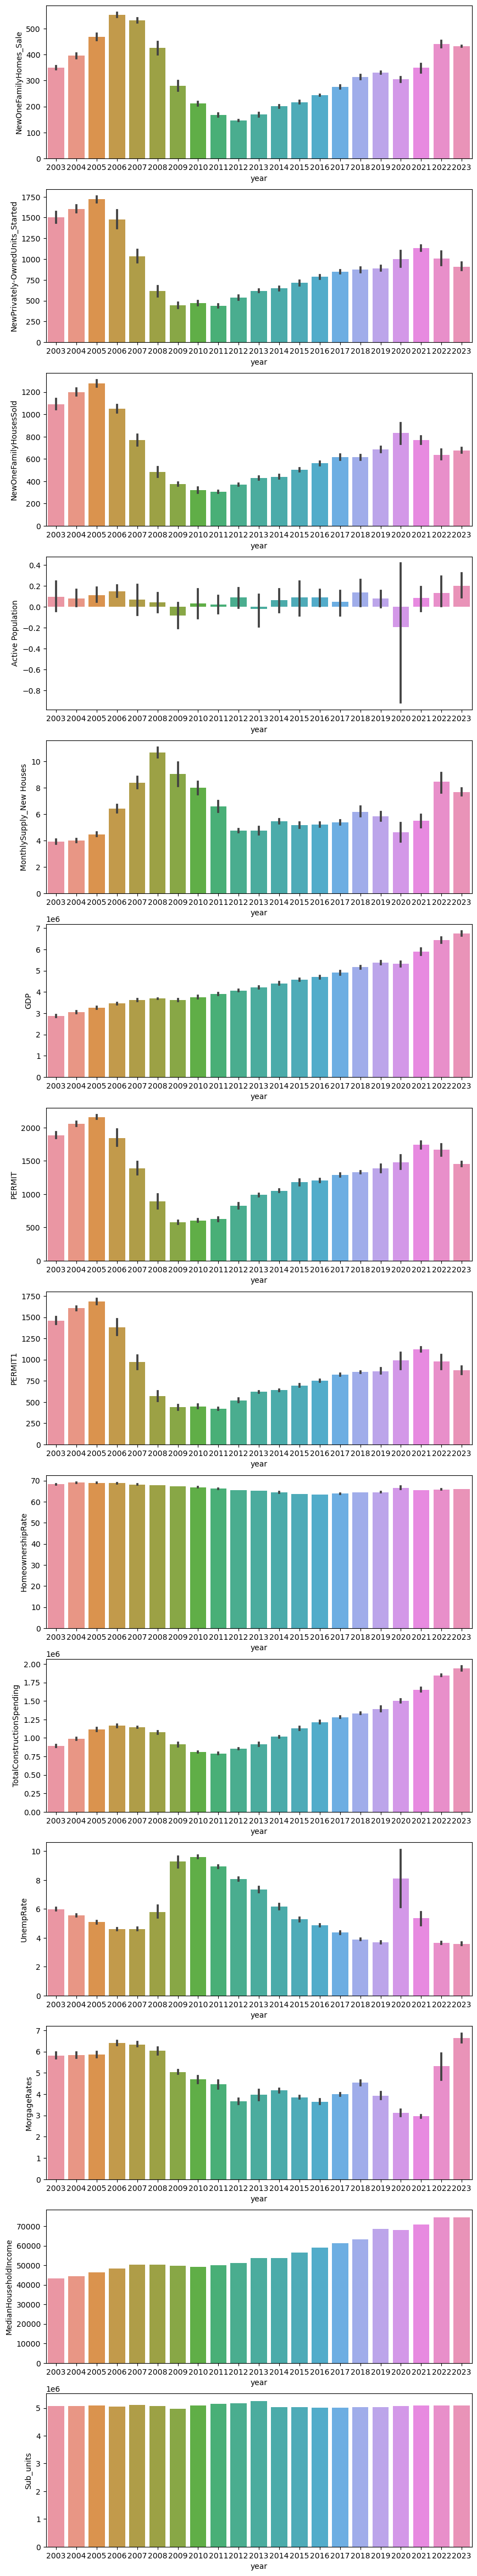

In [21]:
#Plotting graphs for year v/s features
plt.figure(figsize=(10,60))
plotnumber = 1
for column in features:
    if plotnumber <=14:
        ax= plt.subplot(14,1,plotnumber)
        sns.barplot(x='year', y=features[column], data=data)
        
    plotnumber+=1
plt.show

From the above graphs we can conclude that:
    
    Purchase and sale of new houses dropped in mid 2000's compared to the early 2000's and 2020's
    
    The permits for construction also reduced in the mid 2000's
    
    Total Sending on construction was less in mid 2000's, moderate in early 2000's but has increased in the 2020's
    
    Median household imcome has increased gradually over the years
    
    Unemployement rate shot up in 2009, 2010 and 2011 dropped in the folllowing years and again shot uo in 2020,
    however it has come down in 2022 and 2023
    
    Moragage rates followed a falling trend from early 2000's but has seen a sharp peak in 2022 and 2023
    
    GDP has gradually increased over the years 
    
    
    
    
    
    

## Graphes to visualise the realtionship between feature and label

<function matplotlib.pyplot.show(close=None, block=None)>

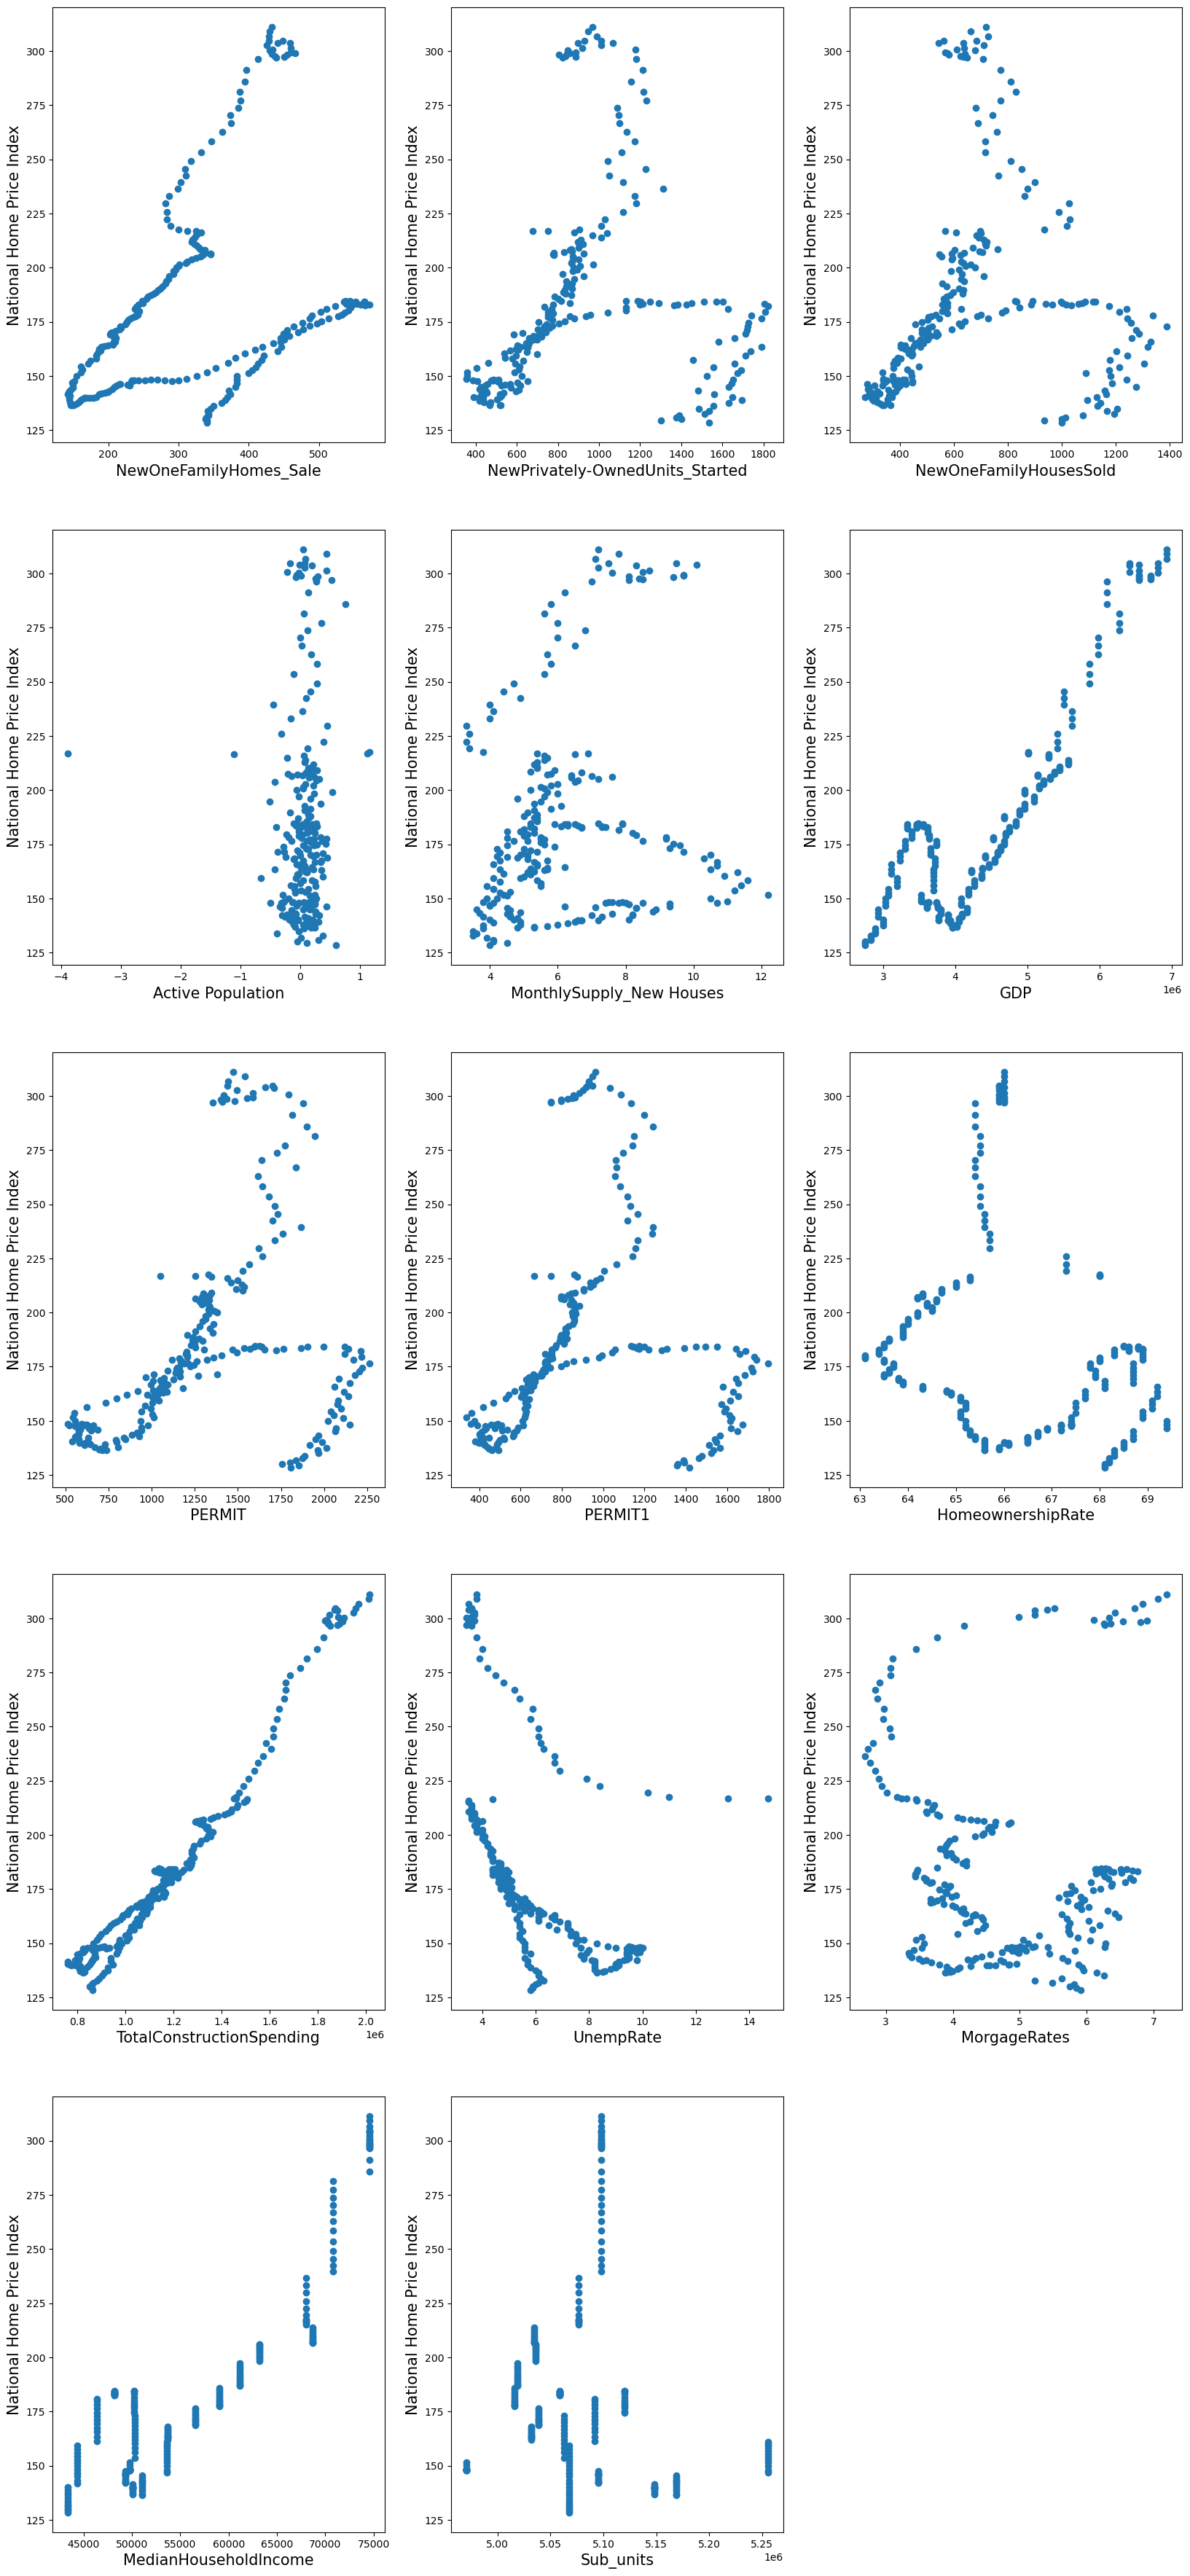

In [22]:
#Plotting feature v/s label graphs
plt.figure(figsize=(20,45))
plotnumber = 1
for column in features:
    if plotnumber <=14:
        ax= plt.subplot(5,3,plotnumber)
        plt.scatter(x= features[column],y= 'National Home Price Index', data=data)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('National Home Price Index',fontsize=15)
    plotnumber+=1
plt.show

##Plotting graphs to visualize feature distribution 

<function matplotlib.pyplot.show(close=None, block=None)>

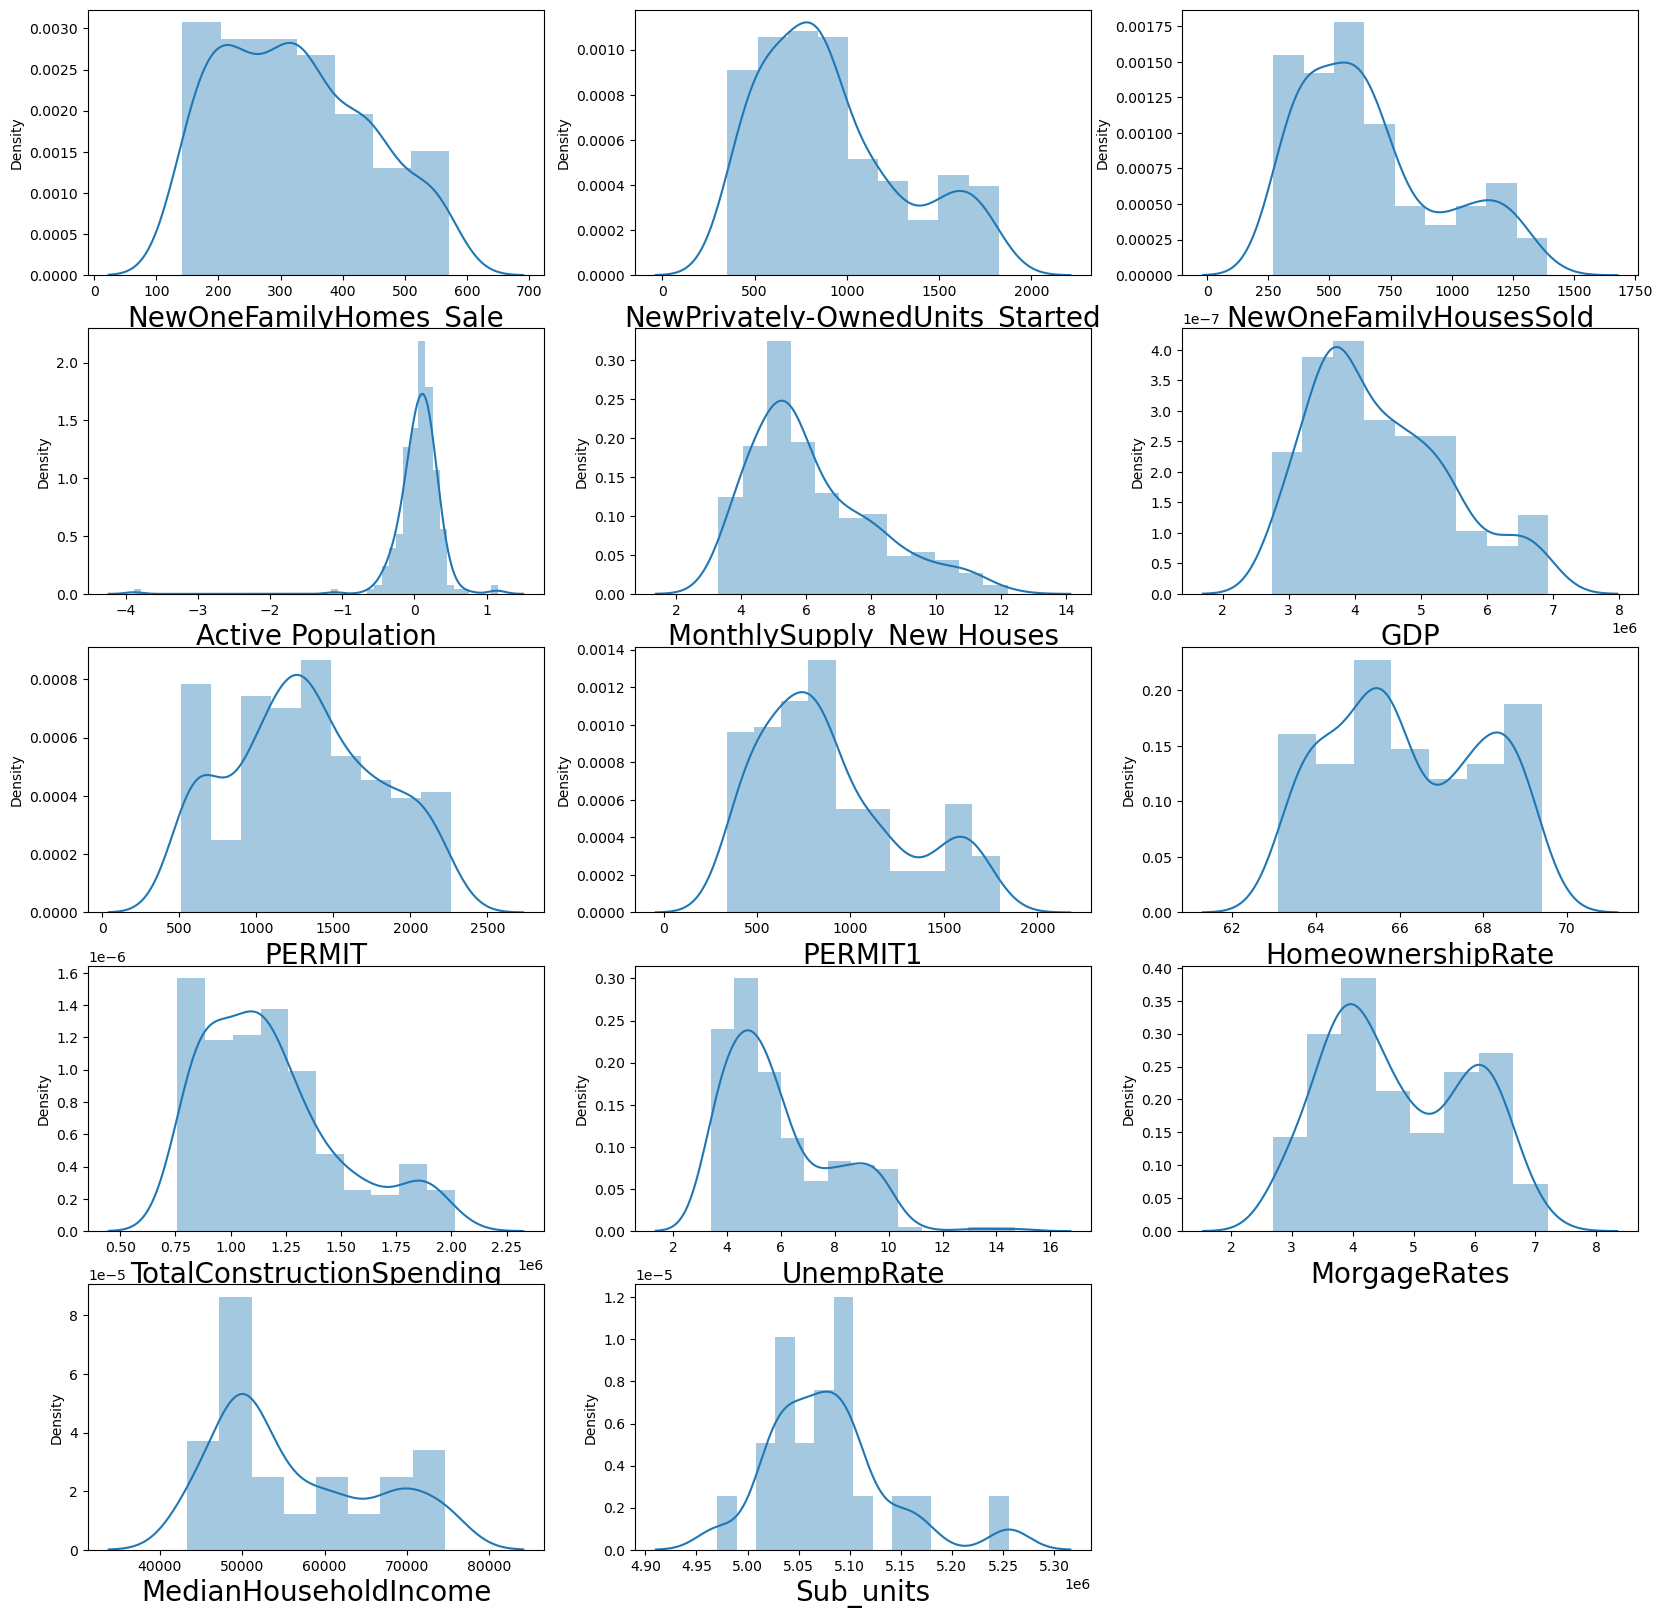

In [23]:
#Plotting graphs for data
plt.figure(figsize=(20,20))
plotnumber = 1
for column in features:
    if plotnumber <=14:
        ax= plt.subplot(5,3,plotnumber)
        sns.distplot(features[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

In [24]:
#checking for skewness
data.skew()

National Home Price Index          1.311186
NewOneFamilyHomes_Sale             0.336496
NewPrivately-OwnedUnits_Started    0.726292
NewOneFamilyHousesSold             0.758752
Active Population                 -5.804101
MonthlySupply_New Houses           0.932554
GDP                                0.618771
PERMIT                             0.117289
PERMIT1                            0.737995
HomeownershipRate                  0.120525
TotalConstructionSpending          0.912868
UnempRate                          1.051399
MorgageRates                       0.197052
MedianHouseholdIncome              0.606893
Sub_units                          1.039959
year                               0.004331
dtype: float64

Most of the data is not skewed except Active Population

Let's check for outliers and see if deleting them reduces the skewness

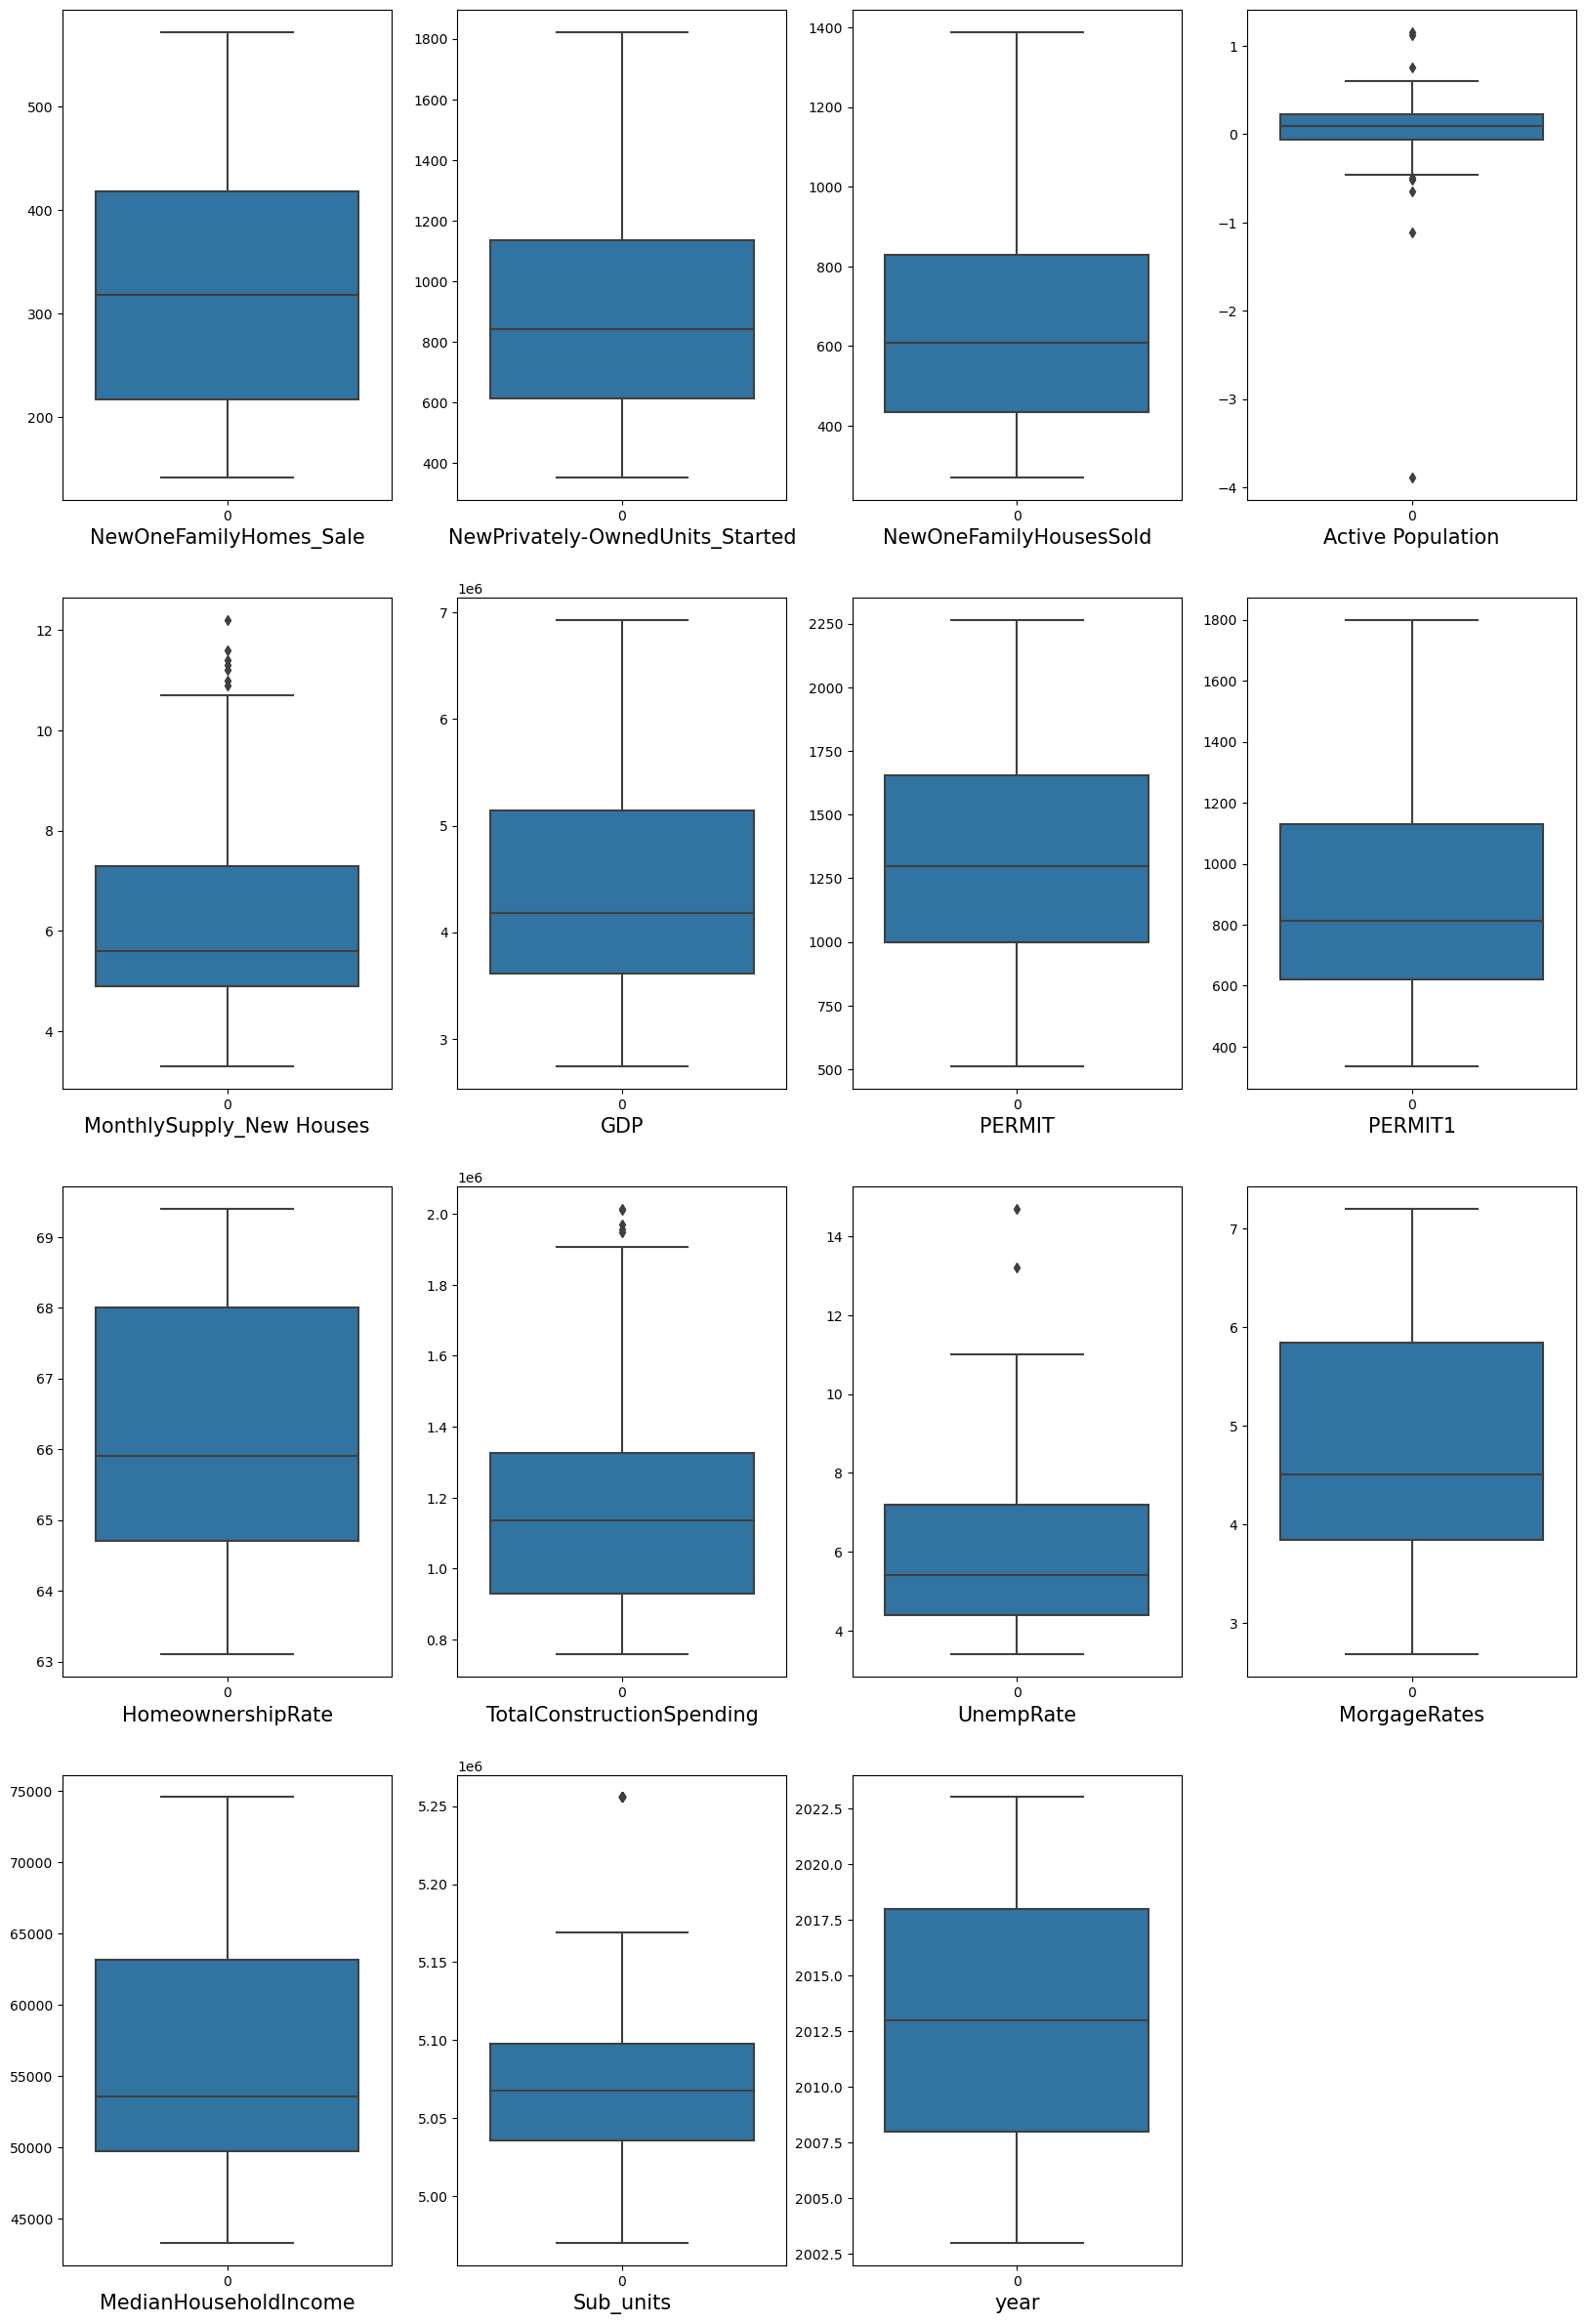

In [25]:
#Checking for outliers using boxplot
plt.figure(figsize=(20,30))
graph =1
for column in features:
    if graph <=16:
        plt.subplot(4,4,graph)
        ax=sns.boxplot(data=features[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [26]:
# Using z-score to detect and treat the outliers
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(features))
threshold=3
outliers=np.where(z>3)
outliers

(array([ 72, 206, 207, 207, 208, 208, 209], dtype=int64),
 array([ 4,  3,  3, 10,  3, 10,  3], dtype=int64))

In [27]:
new_data = data.reset_index()
new_data=new_data.drop(columns=['index'])
new_data

,DATE,National Home Price Index,NewOneFamilyHomes_Sale,NewPrivately-OwnedUnits_Started,NewOneFamilyHousesSold,Active Population,MonthlySupply_New Houses,GDP,PERMIT,PERMIT1,HomeownershipRate,TotalConstructionSpending,UnempRate,MorgageRates,MedianHouseholdIncome,Sub_units,year
0,2003-01-01,128.461,341.0,1537.0,999.0,0.600416,4.0,2743734.0,1808.0,1416.0,68.1,863855.0,5.8,5.9160,43320.0,5067605.0,2003
1,2003-02-01,129.355,341.0,1301.0,936.0,0.111692,4.5,2743734.0,1854.0,1357.0,68.1,859225.0,5.9,5.8425,43320.0,5067605.0,2003
2,2003-03-01,130.148,338.0,1399.0,999.0,-0.053388,4.1,2743734.0,1757.0,1359.0,68.1,851132.0,5.9,5.7450,43320.0,5067605.0,2003
3,2003-04-01,130.884,340.0,1374.0,1012.0,0.309542,4.1,2831413.0,1803.0,1391.0,68.2,859459.0,6.0,5.8125,43320.0,5067605.0,2003
4,2003-05-01,131.735,343.0,1391.0,1078.0,0.017751,3.9,2831413.0,1835.0,1389.0,68.2,866814.0,6.1,5.4840,43320.0,5067605.0,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-05-01,302.566,426.0,1012.0,710.0,0.077990,7.2,6802375.0,1496.0,902.0,65.9,1946733.0,3.7,6.4250,74580.0,5098041.0,2023
245,2023-06-01,304.593,429.0,930.0,683.0,0.079728,7.5,6802375.0,1441.0,924.0,65.9,1956226.0,3.6,6.7140,74580.0,5098041.0,2023
246,2023-07-01,306.767,429.0,988.0,728.0,0.091045,7.1,6928858.0,1443.0,930.0,66.0,1969005.0,3.5,6.8400,74580.0,5098041.0,2023
247,2023-08-01,309.155,430.0,948.0,662.0,0.440447,7.8,6928858.0,1541.0,948.0,66.0,2010143.0,3.8,7.0720,74580.0,5098041.0,2023


In [28]:
new_data.skew()

National Home Price Index          1.311186
NewOneFamilyHomes_Sale             0.336496
NewPrivately-OwnedUnits_Started    0.726292
NewOneFamilyHousesSold             0.758752
Active Population                 -5.804101
MonthlySupply_New Houses           0.932554
GDP                                0.618771
PERMIT                             0.117289
PERMIT1                            0.737995
HomeownershipRate                  0.120525
TotalConstructionSpending          0.912868
UnempRate                          1.051399
MorgageRates                       0.197052
MedianHouseholdIncome              0.606893
Sub_units                          1.039959
year                               0.004331
dtype: float64

Skewness has been controlled 

Let's check for data loss

In [29]:
data_loss=((249-244)/249)*100
data_loss

2.0080321285140563

Since data loss is negligible and it helps us to reduce the skewnesss we will use the new dataset for prediction



## Feature Selection

First let us check for multicollinearity using heatmap

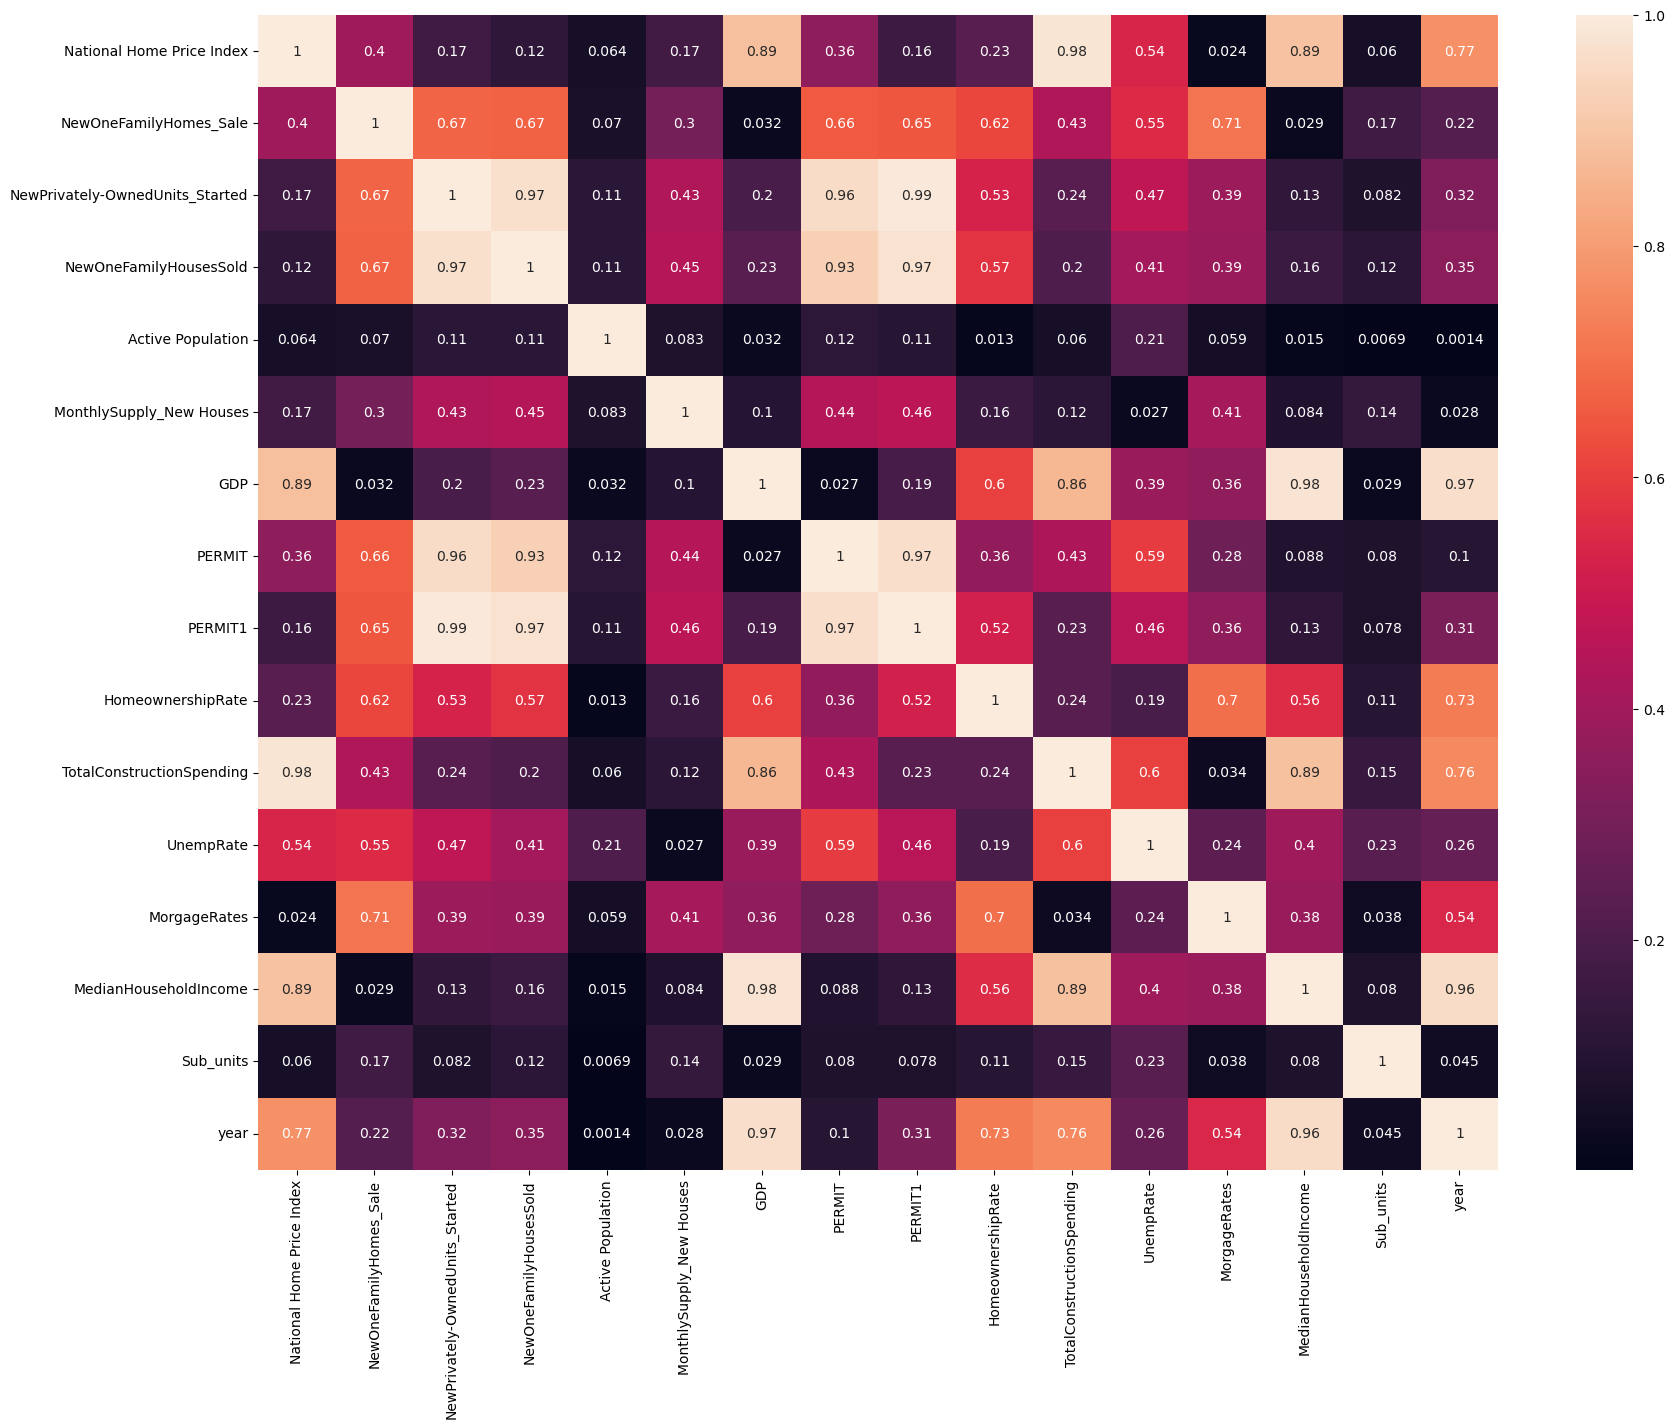

In [30]:
df_corr = new_data.corr().abs()
plt.figure(figsize=(20,15))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()

We observe strong reltionship between many features 

However we will many changes to the dataset after checking for the VIFs

In [31]:
# Dividing data into feature and label
X= new_data.drop(columns=['DATE','year','National Home Price Index'])
Y= new_data['National Home Price Index']

In [32]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['feature']= X.columns
vif

,vif,feature
0,167.199466,NewOneFamilyHomes_Sale
1,525.333019,NewPrivately-OwnedUnits_Started
2,313.917359,NewOneFamilyHousesSold
3,1.123609,Active Population
4,176.626282,MonthlySupply_New Houses
5,1190.279800,GDP
6,663.571639,PERMIT
7,1083.544367,PERMIT1
8,17443.978263,HomeownershipRate
9,1018.550118,TotalConstructionSpending


Very high inflation factors are observed

Will deleted corelated columns to reduce the vifs 

In [33]:
X_new= X.drop(columns=['NewOneFamilyHomes_Sale', 'NewPrivately-OwnedUnits_Started', 'MonthlySupply_New Houses',
                                'PERMIT1','HomeownershipRate','Sub_units','MedianHouseholdIncome'])



In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1= pd.DataFrame()
vif1['vif']=[variance_inflation_factor(X_new,i) for i in range(X_new.shape[1])]
vif1['feature']= X_new.columns
vif1

,vif,feature
0,106.589261,NewOneFamilyHousesSold
1,1.102471,Active Population
2,208.114313,GDP
3,136.477444,PERMIT
4,212.726408,TotalConstructionSpending
5,13.740849,UnempRate
6,16.462735,MorgageRates


## Model Building

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error

In [36]:
#traintestsplit
lr = LinearRegression()
for i in range(200,500):
    x_train,x_test,y_train,y_test = train_test_split (X_new,Y, test_size=0.3, random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print ("At random state ",i,"the model performs well")
        print ("Acuraccy of training model :",r2_score(y_train,pred_train)*100)
        print ("Accuracy of testing model :",r2_score(y_test,pred_test)*100)
        print ("\n-----------------------------------------\n")

At random state  200 the model performs well
Acuraccy of training model : 98.40603828546219
Accuracy of testing model : 98.14191927732901

-----------------------------------------

At random state  203 the model performs well
Acuraccy of training model : 98.32928754704527
Accuracy of testing model : 98.47764144341575

-----------------------------------------

At random state  204 the model performs well
Acuraccy of training model : 98.37135689770619
Accuracy of testing model : 98.451300103169

-----------------------------------------

At random state  205 the model performs well
Acuraccy of training model : 98.45871903360063
Accuracy of testing model : 98.121638964128

-----------------------------------------

At random state  208 the model performs well
Acuraccy of training model : 98.38626676933903
Accuracy of testing model : 98.20588648663018

-----------------------------------------

At random state  209 the model performs well
Acuraccy of training model : 98.3876946020047
Acc

At random state  325 the model performs well
Acuraccy of training model : 98.39925536522965
Accuracy of testing model : 98.39140091747579

-----------------------------------------

At random state  327 the model performs well
Acuraccy of training model : 98.45282311288143
Accuracy of testing model : 98.24330141113866

-----------------------------------------

At random state  328 the model performs well
Acuraccy of training model : 98.38595937943252
Accuracy of testing model : 97.76999167094326

-----------------------------------------

At random state  329 the model performs well
Acuraccy of training model : 98.46681738636985
Accuracy of testing model : 97.50560085047717

-----------------------------------------

At random state  330 the model performs well
Acuraccy of training model : 98.13654894173784
Accuracy of testing model : 98.28136436168839

-----------------------------------------

At random state  332 the model performs well
Acuraccy of training model : 98.3430750129054

At random state  478 the model performs well
Acuraccy of training model : 98.36880245274979
Accuracy of testing model : 98.46015264588495

-----------------------------------------

At random state  481 the model performs well
Acuraccy of training model : 98.41376152444539
Accuracy of testing model : 98.18616637391416

-----------------------------------------

At random state  482 the model performs well
Acuraccy of training model : 98.44485495414102
Accuracy of testing model : 98.2202151701749

-----------------------------------------

At random state  484 the model performs well
Acuraccy of training model : 98.40362877896636
Accuracy of testing model : 97.8737926366089

-----------------------------------------

At random state  487 the model performs well
Acuraccy of training model : 98.34575120161226
Accuracy of testing model : 98.35155008825454

-----------------------------------------

At random state  488 the model performs well
Acuraccy of training model : 98.4885979879514
A

Selecting the random state as 415 since the r2 score for test and train data is almost equal

In [37]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (X_new,Y, test_size=0.3, random_state = 415)

In [38]:
# Model Selection
def model_selection (algorithm, x_train,y_train,x_test,y_test):
    algorithm.fit(x_train,y_train)
    pred_train = algorithm.predict(x_train)
    pred_test = algorithm.predict(x_test)
    mse = mean_squared_error(y_test,pred_test)

    print (algorithm)
    print ("Acuraccy of training model :",r2_score(y_train,pred_train))
    print ("Accuracy of testing model :",r2_score(y_test,pred_test))
    print ("RMSE : ",sqrt(mse))
    print ("\n-----------------------------------------\n")

In [39]:
#Training Model
#Linear Regression
lr= LinearRegression()
model_selection(lr,x_train,y_train,x_test,y_test)

#Decision Tree
dtr = DecisionTreeRegressor()
model_selection(dtr,x_train,y_train,x_test,y_test)

#Random Forest 
rf= RandomForestRegressor()
model_selection(rf,x_train,y_train,x_test,y_test)

#AdaBoost
ada = AdaBoostRegressor()
model_selection(ada,x_train,y_train,x_test,y_test)

#XGBoost
xg = xgb.XGBRegressor()
model_selection(xg,x_train,y_train,x_test,y_test)



LinearRegression()
Acuraccy of training model : 0.9870181484694603
Accuracy of testing model : 0.973253684481077
RMSE :  6.6478309469789005

-----------------------------------------

DecisionTreeRegressor()
Acuraccy of training model : 1.0
Accuracy of testing model : 0.9909326010340435
RMSE :  3.870698531273136

-----------------------------------------

RandomForestRegressor()
Acuraccy of training model : 0.9994738412853982
Accuracy of testing model : 0.9955901615473778
RMSE :  2.699350782893569

-----------------------------------------

AdaBoostRegressor()
Acuraccy of training model : 0.9950700991130981
Accuracy of testing model : 0.9886962699410584
RMSE :  4.321742370442345

-----------------------------------------

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
       

In [40]:
# Saving Model
import pickle
filename= 'Housing_price_pred.pkl'
pickle.dump(lr,open(filename, 'wb'))

Choosing Liner Regression as our model for prediction it has an accuracy of 97.5%

In [41]:
#Final Prediction
a= np.array(y_test)
predicted=np.array (lr.predict(x_test))
df = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df

,Orignal,Predicted
0,181.600,176.474376
1,139.862,137.747666
2,175.739,181.426267
3,296.445,283.003473
4,239.560,239.829687
...,...,...
70,182.594,174.915995
71,139.730,137.798856
72,143.019,135.974954
73,160.074,161.300342


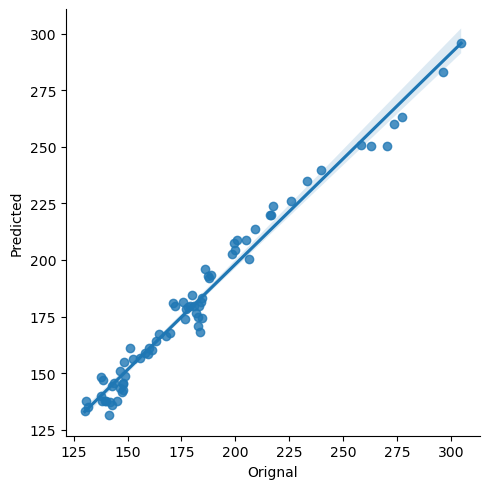

In [42]:
sns.lmplot(x='Orignal',y='Predicted',data=df)

The above graph shows that the model works quite accurately